In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')

In [37]:
testing.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [38]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


C:\Users\gasni\AppData\Local\Temp\ipykernel_15632\612444480.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copy["Age"])


<Axes: xlabel='Age', ylabel='Density'>

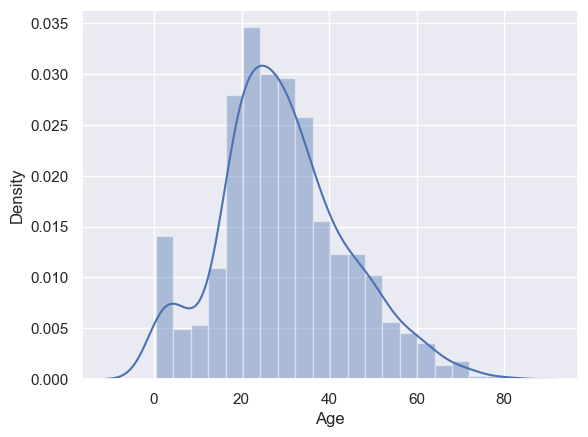

In [39]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

In [8]:
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


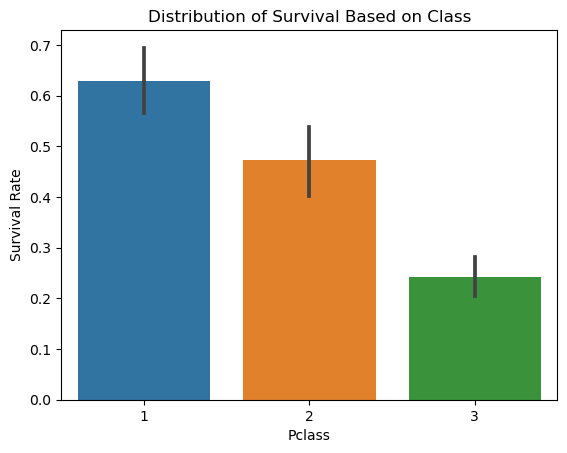

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [9]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

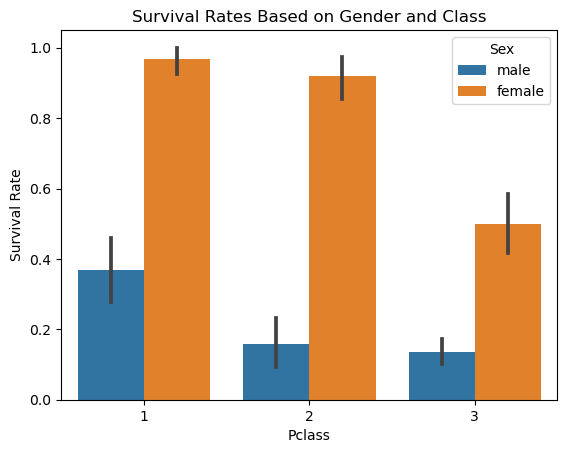

In [10]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

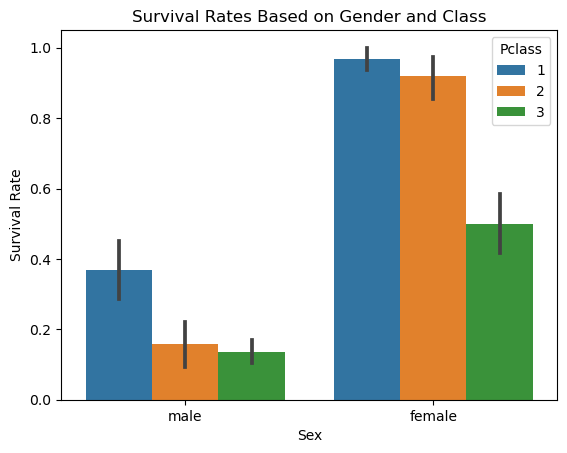

In [11]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

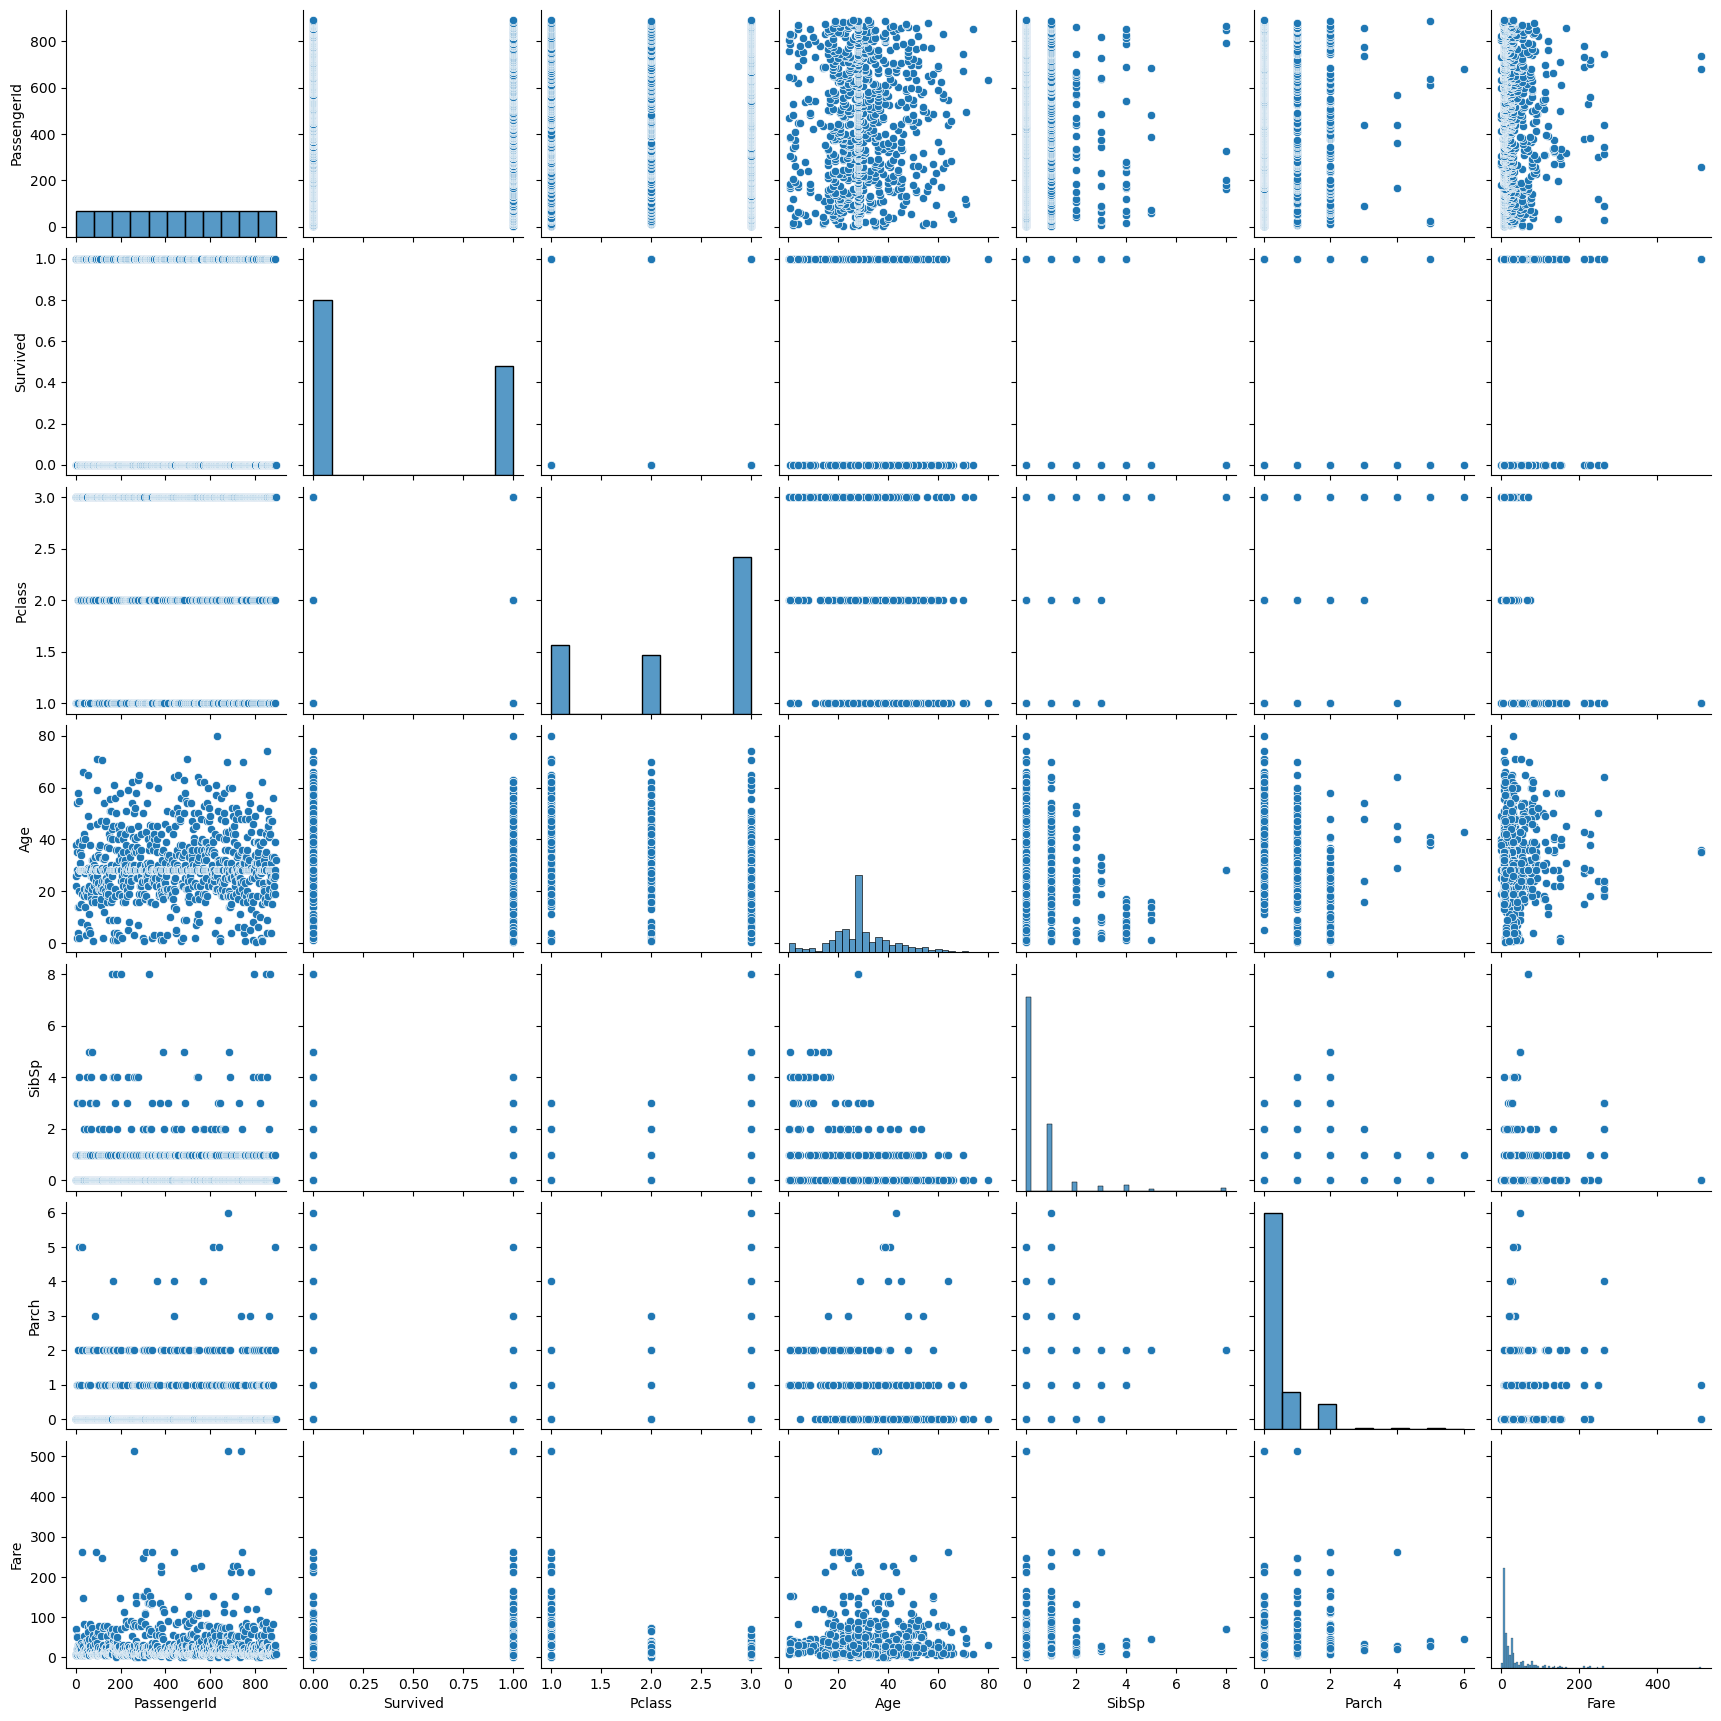

In [12]:
sns.pairplot(training)

In [13]:
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1


training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1


testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2


In [14]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
from sklearn.metrics import make_scorer, accuracy_score 

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize"]
X_train = training[features] 
y_train = training["Survived"] 
X_test = testing[features] 


In [40]:
from sklearn.model_selection import train_test_split 
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) 

In [41]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.8268156424581006


In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [46]:
rep = classification_report(y_valid, pred_rf)
print(rep)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [47]:
cm = confusion_matrix(y_valid, rf_clf.predict(X_valid))
cm

array([[91, 14],
       [17, 57]], dtype=int64)

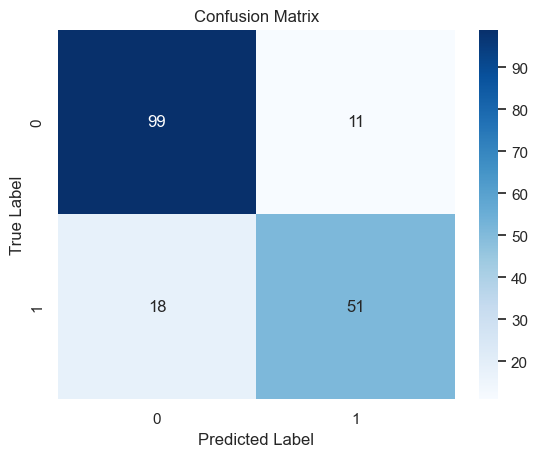

In [23]:
sns.set()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [24]:
model_performance = pd.DataFrame({
    "Model": ["Random Forest"],
    "Accuracy": [ acc_rf]
})

model_performance.sort_values(by="Accuracy", ascending=False)

Model  Accuracy
0  Random Forest  0.837989

In [25]:
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

In [26]:
grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=9)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

logistic_Reg = LogisticRegression()
n_components = list(range(1,X_training.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)
grid_cv2 = GridSearchCV(logistic_Reg, parameters)
grid_cv2 = grid_cv.fit(X_train, y_train)
print("Our optimized logistic regression model is:")
grid_cv.best_estimator_

Our optimized logistic regression model is:


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=8)

In [28]:
optimal_model = grid_cv.best_estimator_
optimal_model.fit(X_train, y_train)
predict_optimal = optimal_model.predict(X_valid)
final_accuracy = accuracy_score(y_valid, predict_optimal)

In [29]:
print(final_accuracy)

0.9106145251396648


In [30]:
from sklearn.model_selection import learning_curve

In [31]:
N, train_score, val_score = learning_curve(rf_clf, X_train, y_train, train_sizes= np.linspace(0.1,1,10), cv=5)

[ 71 142 213 284 356 427 498 569 640 712]


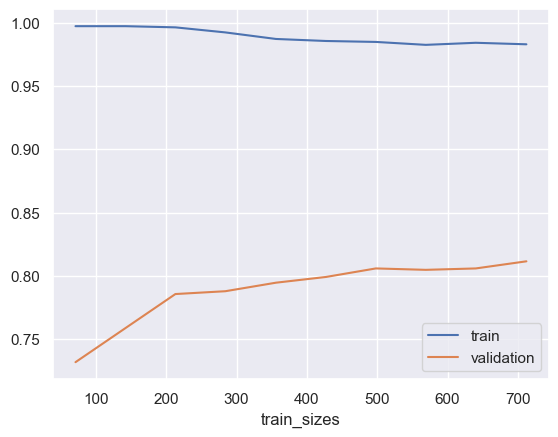

In [32]:
N, train_score, val_score = learning_curve(rf_clf, X_train, y_train, train_sizes= np.linspace(0.1,1,10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [48]:
submission_predictions =optimal_model.predict(X_test)
submission = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("titanic.csv", index=False)
print(submission.shape)


(418, 2)


In [50]:
gender = pd.read_csv('gender_submission.csv')

output = pd.DataFrame({'PassengerId': gender.PassengerId, 'Survived': submission_predictions})
output.to_csv('submissiontitanic.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
